In [ ]:
#submission date: 8/02/2024 (Thursday)


**Q1. Problem Statement: Univariate EDA**

Load the “cereal.csv” data into a DataFrame and perform the following tasks:

1.	Explore the DataFrame using info() and describe() functions

2.	Replace the manufacturer names with the dictionary of names given here –
{'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs','N':'Nabisco', 'P':'Post', 'Q':'Quaker Oats', 'R':'Ralston Purina'}

3.	Find out the top five cereal manufacturers based on customer ratings

4.	With the help of a barplot, compare the manufacturers based on customer ratings

5.	With the help of a pie chart, find out which of the manufacturers are the largest producers of cereals


4.	Find out cereal manufacturers whose products are rich in protein but contains minimal calories, with the help of a scatter plot


5.	Using a heatmap, plot the correlation and covariance between all the nutritional values present in the cereals



In [17]:
cereal = "C:\\Users\\alok\\Downloads\\cereal.csv"
import pandas as pd
cereal = pd.read_csv(cereal)

In [18]:
print(cereal.head())
print(cereal.columns)

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 

In [19]:
replace = {'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs','N':'Nabisco', 'P':'Post', 'Q':'Quaker Oats', 'R':'Ralston Purina'}
cereal['mfr'] = cereal['mfr'].replace(replace)

In [20]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [22]:
grouped = cereal.groupby('mfr')['rating'].agg('max')
grouped.head()


mfr
American Home Food Products    54.850917
General Mills                  51.592193
Kelloggs                       93.704912
Nabisco                        74.472949
Post                           53.371007
Name: rating, dtype: float64

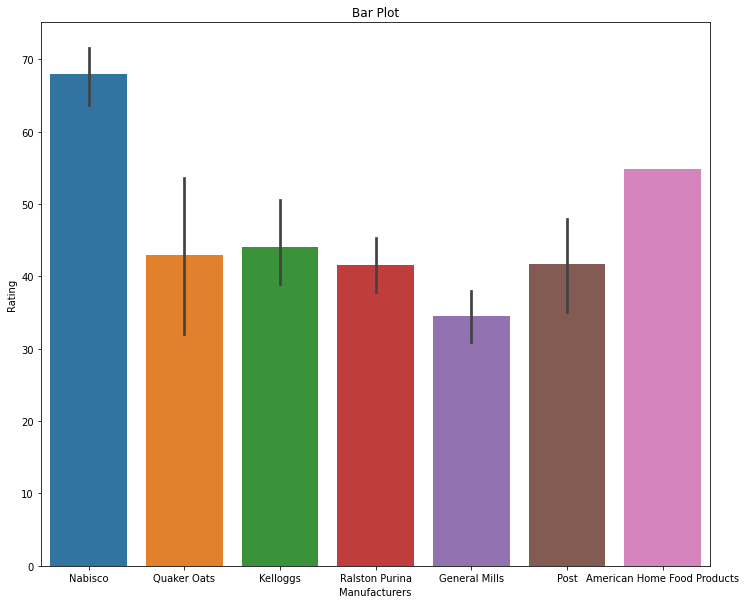

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 10))

# Data
x = cereal['mfr']
y = cereal['rating']

# Create bar plot
sns.barplot(x=x, y=y)

plt.xlabel('Manufacturers')
plt.ylabel('Rating')
plt.title('Bar Plot')

# Show plot
plt.show()


<Figure size 864x720 with 0 Axes>

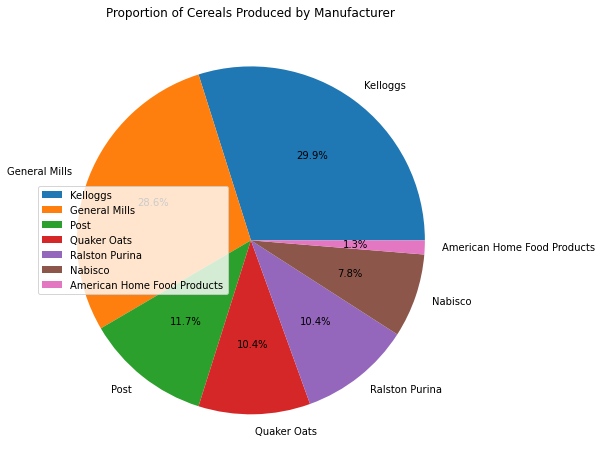

In [32]:
# 5. With the help of a pie chart, find out which of the manufacturers are the largest producers of cereals


plt.figure(figsize=(12, 10))

manufacturer_counts = cereal['mfr'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(x=manufacturer_counts.values, labels=manufacturer_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Cereals Produced by Manufacturer')
plt.ylabel('')  # Remove the default ylabel
plt.legend()
plt.show()

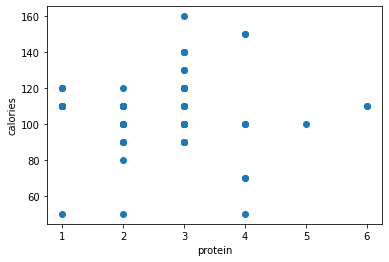

In [34]:
# Find out cereal manufacturers whose products are rich in protein but contains minimal calories, with the help of a scatter plot



x= cereal['protein']
y= cereal['calories']
plt.scatter(x,y)
plt.xlabel('protein')
plt.ylabel('calories')
plt.show()

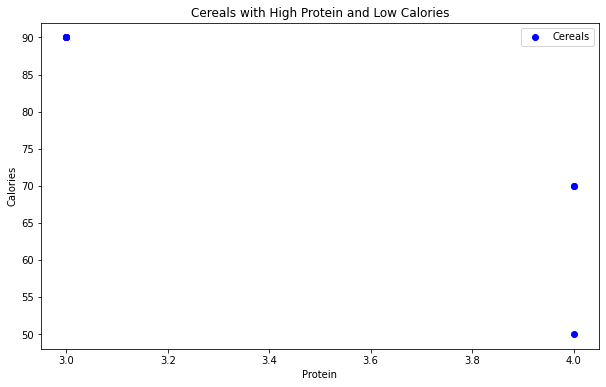

Manufacturers of cereals with high protein and low calories:
['Nabisco' 'Kelloggs' 'Post']


In [35]:
import matplotlib.pyplot as plt

# Filter cereals with high protein and low calorie values
filtered_cereals = cereal[(cereal['protein'] > 2) & (cereal['calories'] < 100)]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_cereals['protein'], filtered_cereals['calories'], label='Cereals', color='blue')
plt.xlabel('Protein')
plt.ylabel('Calories')
plt.title('Cereals with High Protein and Low Calories')
plt.legend()
plt.show()

# Print the manufacturers of the filtered cereals
print("Manufacturers of cereals with high protein and low calories:")
print(filtered_cereals['mfr'].unique())


In [41]:
# 5.	Using a heatmap, plot the correlation and covariance between all the nutritional values present in the cereals
nutrition = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
nutrition = cereal[nutrition]
nutrition.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25


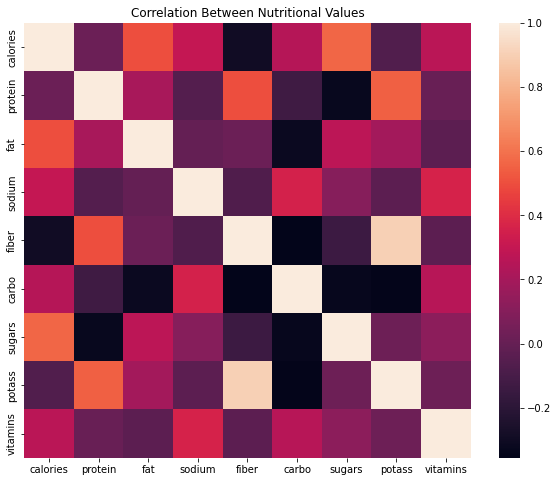

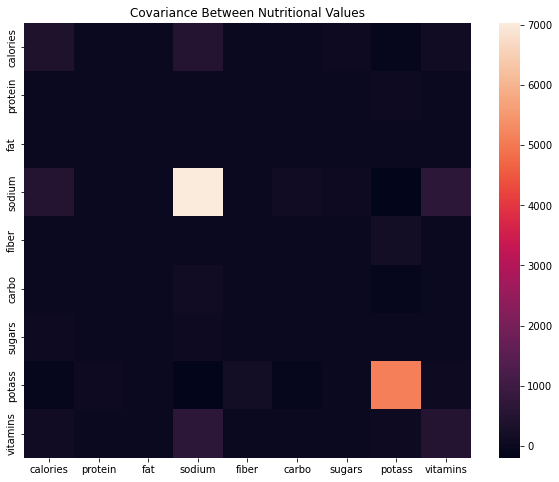

In [42]:
correlation_matrix = nutrition.corr()

# Calculate covariance matrix
covariance_matrix = nutrition.cov()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Nutritional Values')
plt.show()

# Plot covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix)
#sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Between Nutritional Values')
plt.show()

#Web scraping

Write  a  Python  program  that  can  extract  the  data  from  a  website  using  web scrapping concepts to perform the following tasks:

1.Use the request library and the link to extract the data.

2.Use BeautifulSoup to prepare the website's source code, then try to find a table on the source page.

3.After finding the table, extract data from all available columns and store it in the dataframe.Website Link:Use the below link to get the data from the table on the website.

https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population


In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Use the requests library to fetch the HTML content of the website
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
response = requests.get(url)
html_content = response.text

# Step 2: Use BeautifulSoup to parse the HTML and find the table
soup = BeautifulSoup(html_content, "html.parser")
table = soup.find("table", {"class": "wikitable"})

# Step 3: Extract data from all available columns and store it in a dataframe
data = []
rows = table.find_all("tr")
for row in rows:
    cols = row.find_all(["th", "td"])
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Remove empty rows
data = [row for row in data if row]

# Create dataframe
df = pd.DataFrame(data[1:], columns=data[0])

print(df)


                              Country / dependency     Population   % ofworld  \
0           –                                World  8,087,768,000        100%   
1    1/2  [b]                                China  1,409,670,000       17.4%   
2       India                        1,392,329,000          17.2%  1 Jul 2023   
3           3                        United States    335,893,238        4.2%   
4           4                            Indonesia    279,118,866        3.5%   
..        ...                                  ...            ...         ...   
236         –                            Niue (NZ)          1,689          0%   
237         –                         Tokelau (NZ)          1,647          0%   
238       195                         Vatican City            764          0%   
239         –  Cocos (Keeling) Islands (Australia)            593          0%   
240         –                Pitcairn Islands (UK)             47          0%   

                       Date

In [7]:
df = df.iloc[3:].reset_index(drop=True)

In [8]:
df

,,Country / dependency,Population,% ofworld,Date,Source (official or fromthe United Nations),
0,3,United States,"335,893,238",4.2%,1 Jan 2024,Official estimate[7],[e]
1,4,Indonesia,"279,118,866",3.5%,1 Jul 2023,National annual projection[8],
2,5,Pakistan,"241,499,431",3.0%,1 Mar 2023,2023 census result[9],[f]
3,6,Nigeria,"216,783,381",2.7%,1 Jul 2022,Official projection[10],
4,7,Brazil,"203,080,756",2.5%,1 Aug 2022,2022 census result[11],
...,...,...,...,...,...,...,...
233,–,Niue (NZ),"1,689",0%,11 Nov 2022,2022 Census [232],
234,–,Tokelau (NZ),"1,647",0%,1 Jan 2019,2019 Census [233],
235,195,Vatican City,764,0%,26 Jun 2023,Official figure[234],[af]
236,–,Cocos (Keeling) Islands (Australia),593,0%,30 Jun 2020,2021 Census[235],
